# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import json
import requests
from config import weather_key
from citipy import citipy
import time 
import numpy as np
import random 

In [2]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
cities = []
units ="imperial"

## Generate Cities List

In [3]:
#Generate Longitudes, Latitudes, then Append the city names
for i in range(100):
    Long = round(random.uniform(-180, 180), 2)
    Lat = round(random.uniform(-90, 90), 2)
    city = citipy.nearest_city(Lat, Long).city_name
    if city not in cities:
        cities.append(city)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Get weather data
counter = 0
name_city = []
longitude = []
latitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []

for city in cities:
    try:
        query_url = url + "appid=" + weather_key + "&q=" + city + "&units=" + units
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        name_city.append(weather_json['name'])
        longitude.append(weather_json['coord']['lon'])
        latitude.append(weather_json['coord']['lat'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        counter += 1
        print(f'Retrieving {city} data. This is city #{counter}.')
        time.sleep(1)
    except:
        print('Data not found. Move along home.')
        continue

Retrieving front royal data. This is city #1.
Data not found. Move along home.
Retrieving cabedelo data. This is city #2.
Retrieving kremenki data. This is city #3.
Retrieving avarua data. This is city #4.
Retrieving punta arenas data. This is city #5.
Retrieving cobija data. This is city #6.
Retrieving rikitea data. This is city #7.
Retrieving cervo data. This is city #8.
Retrieving albany data. This is city #9.
Retrieving clyde river data. This is city #10.
Retrieving tiksi data. This is city #11.
Retrieving vestmanna data. This is city #12.
Retrieving coihaique data. This is city #13.
Retrieving cape town data. This is city #14.
Retrieving maiduguri data. This is city #15.
Data not found. Move along home.
Retrieving mataura data. This is city #16.
Retrieving thinadhoo data. This is city #17.
Retrieving elban data. This is city #18.
Retrieving kapaa data. This is city #19.
Retrieving moron data. This is city #20.
Retrieving homer data. This is city #21.
Retrieving qasigiannguit data.

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
data = {'City Name': name_city, 'Longtitude': longitude, 'Latitude': latitude, 'Temperature (f)':max_temp, 'Humidity':humidity,\
       'Cloudiness': cloudiness, 'Wind Speed (mph)': wind_speed}
data_df = pd.DataFrame(data)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#Cut out Humidity Outliers
data_df[data_df['Humidity'] <= 100]

In [21]:
#Push clean data set to CSV
data_df.to_csv('Output Data/weather_data.csv')

In [17]:
#Create Northern Hemisphere Dataframe
Northern_df = data_df[data_df['Latitude'] > 0]

In [20]:
#Create Southern Hemisphere Dataframe
Southern_df = data_df[data_df['Latitude'] < 0]
Southern_df

,City Name,Longtitude,Latitude,Temperature (f),Humidity,Cloudiness,Wind Speed (mph)
1,Cabedelo,-34.83,-6.98,86.00,55,40,13.87
3,Avarua,-159.78,-21.21,73.40,94,5,4.70
4,Punta Arenas,-70.92,-53.15,46.40,52,20,38.03
5,Cobija,-68.77,-11.03,96.94,35,16,4.56
6,Rikitea,-134.97,-23.12,73.83,79,0,14.88
12,Coyhaique,-72.07,-45.58,50.00,69,75,5.82
13,Cape Town,18.42,-33.93,62.01,55,20,8.05
15,Mataura,168.86,-46.19,48.00,70,70,15.99
19,Morón,-58.62,-34.65,78.80,69,75,8.05
24,Lebu,-73.65,-37.62,56.32,58,2,11.59


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

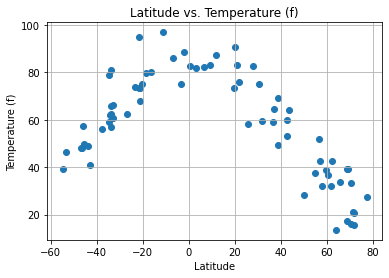

In [24]:
#Overall Latitude vs Temperature
Lattemp = data_df['Latitude']
Templat = data_df['Temperature (f)']
plt.scatter(Lattemp, Templat)
plt.xlabel('Latitude')
plt.ylabel('Temperature (f)')
plt.title('Latitude vs. Temperature (f)')
plt.grid(True)
# Save the figure.
plt.savefig('Images/Temp_vs_Lat.png')

## Latitude vs. Humidity Plot

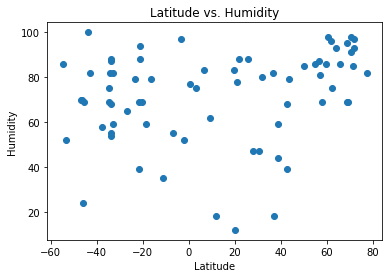

In [25]:
#Overall Latitude vs Humidity
Lathum = data_df['Latitude']
Humlat = data_df['Humidity']
plt.scatter(Lathum, Humlat)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
# Save the figure.
plt.savefig('Images/Humidity_vs_Lat.png')

## Latitude vs. Cloudiness Plot

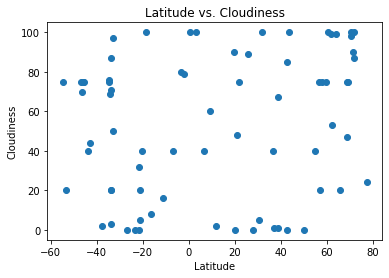

In [26]:
#Overall Latitude vs Cloudiness
Latcloud = data_df['Latitude']
Cloudlat = data_df['Cloudiness']
plt.scatter(Latcloud, Cloudlat)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
# Save the figure.
plt.savefig('Images/Cloudiness_vs_Lat.png')

## Latitude vs. Wind Speed Plot

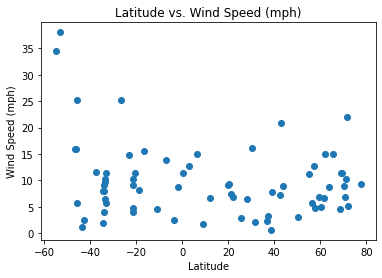

In [27]:
#Overall Latitude vs Wind Speed
Latwind = data_df['Latitude']
Windlat = data_df['Wind Speed (mph)']
plt.scatter(Latwind, Windlat)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed (mph)')
# Save the figure.
plt.savefig('Images/Windspeed_vs_Lat.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression